# Recurrent Neural Network

-----

In this notebook, I would be trying to recreate an example for learning Recurrent Neural Networks using LSTMs

In [1]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Hyperparameters
num_epochs = 100
total_series_length = 50000
truncated_backprop_length = 15
state_size = 4
num_classes = 2
echo_step = 3
batch_size = 5
num_batches = total_series_length//batch_size//truncated_backprop_length

In [3]:
def generateData():
    x = np.array(np.random.choice(2, total_series_length, p=[0.5, 0.5]))
    y = np.roll(x, echo_step)
    y[0:echo_step] = 0
    
    x = x.reshape((batch_size, -1))
    y = y.reshape((batch_size, -1))
    
    return (x, y)

In [4]:
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, truncated_backprop_length])
batchY_placeholder = tf.placeholder(tf.int32, [batch_size, truncated_backprop_length])

init_state = tf.placeholder(tf.float32, [batch_size, state_size])

In [5]:
W = tf.Variable(np.random.rand(state_size+1, state_size), dtype=tf.float32)
b = tf.Variable(np.zeros((1, state_size)), dtype=tf.float32)

W2 = tf.Variable(np.random.rand(state_size, num_classes), dtype=tf.float32)
b2 = tf.Variable(np.zeros((1, num_classes)), dtype=tf.float32)

In [6]:
inputs_series = tf.unstack(batchX_placeholder, axis=1)
labels_series = tf.unstack(batchY_placeholder, axis=1)

In [7]:
#Forward Pass
current_state = init_state
states_series = []

for current_input in inputs_series:
    current_input = tf.reshape(current_input, [batch_size, 1])
    input_and_state_concatenated = tf.concat([current_input, current_state], 1)
    
    next_state = tf.tanh(tf.matmul(input_and_state_concatenated, W) + b)
    states_series.append(next_state)
    current_state = next_state

In [8]:
logits_series = [tf.matmul(state, W2) + b2 for state in states_series] 
predictions_series = [tf.nn.softmax(logits) for logits in logits_series]

losses = [tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=labels) for logits, labels in zip(logits_series,labels_series)]
total_loss = tf.reduce_mean(losses)

train_step = tf.train.AdagradOptimizer(0.3).minimize(total_loss)

In [15]:
def plot(loss_list, predictions_series, batchX, batchY):
    plt.subplot(2, 3, 1)
    plt.cla()
    plt.plot(loss_list)

    for batch_series_idx in range(5):
        one_hot_output_series = np.array(predictions_series)[:, batch_series_idx, :]
        single_output_series = np.array([(1 if out[0] < 0.5 else 0) for out in one_hot_output_series])

        plt.subplot(2, 3, batch_series_idx + 2)
        plt.cla()
        plt.axis([0, truncated_backprop_length, 0, 2])
        left_offset = range(truncated_backprop_length)
        plt.bar(left_offset, batchX[batch_series_idx, :], width=1, color="blue")
        plt.bar(left_offset, batchY[batch_series_idx, :] * 0.5, width=1, color="red")
        plt.bar(left_offset, single_output_series * 0.3, width=1, color="green")

    plt.draw()
    plt.pause(0.0001)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


New Data, epoch 0
Step: 0, Loss: 0.6982260346412659
Step: 100, Loss: 0.6909540891647339
Step: 200, Loss: 0.6933677792549133
Step: 300, Loss: 0.686427891254425
Step: 400, Loss: 0.64141446352005
Step: 500, Loss: 0.24943743646144867
Step: 600, Loss: 0.3418334126472473
New Data, epoch 1
Step: 0, Loss: 0.22910964488983154
Step: 100, Loss: 0.2557568848133087
Step: 200, Loss: 0.3126926124095917
Step: 300, Loss: 0.30893421173095703
Step: 400, Loss: 0.3965648114681244
Step: 500, Loss: 0.38906967639923096
Step: 600, Loss: 0.3283645808696747
New Data, epoch 2
Step: 0, Loss: 0.2646329998970032
Step: 100, Loss: 0.2883141040802002
Step: 200, Loss: 0.2185949981212616
Step: 300, Loss: 0.25265076756477356
Step: 400, Loss: 0.33784013986587524
Step: 500, Loss: 0.27398058772087097
Step: 600, Loss: 0.42252618074417114
New Data, epoch 3
Step: 0, Loss: 0.22057533264160156
Step: 100, Loss: 0.37906351685523987
Step: 200, Loss: 0.34196794033050537
Step: 300, Loss: 0.2647395133972168
Step: 400, Loss: 0.342765659

Step: 100, Loss: 0.3426566421985626
Step: 200, Loss: 0.30971381068229675
Step: 300, Loss: 0.36648499965667725
Step: 400, Loss: 0.48000189661979675
Step: 500, Loss: 0.40259334444999695
Step: 600, Loss: 0.3388187885284424
New Data, epoch 31
Step: 0, Loss: 0.2548675537109375
Step: 100, Loss: 0.3991827666759491
Step: 200, Loss: 0.30854177474975586
Step: 300, Loss: 0.3764662742614746
Step: 400, Loss: 0.3099783658981323
Step: 500, Loss: 0.288003146648407
Step: 600, Loss: 0.3098949193954468
New Data, epoch 32
Step: 0, Loss: 0.2144133299589157
Step: 100, Loss: 0.25546079874038696
Step: 200, Loss: 0.278865247964859
Step: 300, Loss: 0.34178438782691956
Step: 400, Loss: 0.40096527338027954
Step: 500, Loss: 0.3401295840740204
Step: 600, Loss: 0.31134602427482605
New Data, epoch 33
Step: 0, Loss: 0.22376801073551178
Step: 100, Loss: 0.3092517554759979
Step: 200, Loss: 0.27899307012557983
Step: 300, Loss: 0.3086579740047455
Step: 400, Loss: 0.4254817068576813
Step: 500, Loss: 0.3116491138935089
Step

Step: 300, Loss: 0.31209346652030945
Step: 400, Loss: 0.36920174956321716
Step: 500, Loss: 0.36722829937934875
Step: 600, Loss: 0.36998313665390015
New Data, epoch 61
Step: 0, Loss: 0.2201496958732605
Step: 100, Loss: 0.3441466987133026
Step: 200, Loss: 0.3106577694416046
Step: 300, Loss: 0.2810341715812683
Step: 400, Loss: 0.3132396936416626
Step: 500, Loss: 0.3700883686542511
Step: 600, Loss: 0.4271877408027649
New Data, epoch 62
Step: 0, Loss: 0.24713531136512756
Step: 100, Loss: 0.2544262111186981
Step: 200, Loss: 0.30600666999816895
Step: 300, Loss: 0.33866462111473083
Step: 400, Loss: 0.28480803966522217
Step: 500, Loss: 0.36976316571235657
Step: 600, Loss: 0.4272898733615875
New Data, epoch 63
Step: 0, Loss: 0.21703974902629852
Step: 100, Loss: 0.39829888939857483
Step: 200, Loss: 0.3962586522102356
Step: 300, Loss: 0.28082752227783203
Step: 400, Loss: 0.39671066403388977
Step: 500, Loss: 0.307517409324646
Step: 600, Loss: 0.33296698331832886
New Data, epoch 64
Step: 0, Loss: 0.

Step: 400, Loss: 0.22245854139328003
Step: 500, Loss: 0.3086817264556885
Step: 600, Loss: 0.36758193373680115
New Data, epoch 91
Step: 0, Loss: 0.2219458520412445
Step: 100, Loss: 0.37207937240600586
Step: 200, Loss: 0.31147122383117676
Step: 300, Loss: 0.30882781744003296
Step: 400, Loss: 0.34865260124206543
Step: 500, Loss: 0.3373330533504486
Step: 600, Loss: 0.36798369884490967
New Data, epoch 92
Step: 0, Loss: 0.23088236153125763
Step: 100, Loss: 0.30736827850341797
Step: 200, Loss: 0.22391855716705322
Step: 300, Loss: 0.36913013458251953
Step: 400, Loss: 0.3410896360874176
Step: 500, Loss: 0.3399641811847687
Step: 600, Loss: 0.3115423619747162
New Data, epoch 93
Step: 0, Loss: 0.22599206864833832
Step: 100, Loss: 0.21484842896461487
Step: 200, Loss: 0.398555725812912
Step: 300, Loss: 0.4558994174003601
Step: 400, Loss: 0.34316694736480713
Step: 500, Loss: 0.3086968660354614
Step: 600, Loss: 0.36789068579673767
New Data, epoch 94
Step: 0, Loss: 0.23435740172863007
Step: 100, Loss: 

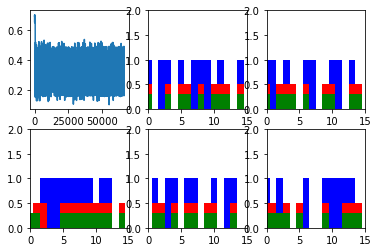

In [16]:
#Running the RNN

with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())
    plt.ion()
    plt.figure()
    plt.show()
    loss_list = []
    
    for epoch_idx in range(num_epochs):
        x, y = generateData()
        _current_state = np.zeros((batch_size, state_size))
        
        print("New Data, epoch", epoch_idx)
        
        for batch_idx in range(num_batches):
            start_idx = batch_idx + truncated_backprop_length
            end_idx = start_idx + truncated_backprop_length
            
            batchX = x[:, start_idx:end_idx]
            batchY = y[:, start_idx:end_idx]
            
            _total_loss, _train_step, _current_state, _prediction_series = sess.run(
                [total_loss, train_step, current_state, predictions_series],
                feed_dict = {
                    batchX_placeholder: batchX,
                    batchY_placeholder: batchY,
                    init_state: _current_state
                }
            )
            
            loss_list.append(_total_loss)
            
            if batch_idx%100==0:
                print('Step: {}, Loss: {}'.format(batch_idx, _total_loss))
                plot(loss_list, _prediction_series, batchX, batchY)
plt.ioff()
plt.show()
                